## Simulation of Hospital Management System using Imaginary Patients Dataset

### First

**Generate imaginary dataset within some time (Mar-Apr 2015) interval**.

In [1]:
%run src/generate_dataset.py 9000 2 4

generated patients dataset and wrote output into: 
	patients-data.csv


**Verify consistency of the generated dataset**

In [2]:
%run src/verify_dataset.py

9000 patients were admitted between March/April 2015
9.23333333333% admitted into IC Rooms (831)
2.01611111111 day(s) is the average stay of a patient


<hr>

In [3]:
%matplotlib inline

### Second
Exploring the patients dataset<br>

In [4]:
import src.patient_dataset as patients

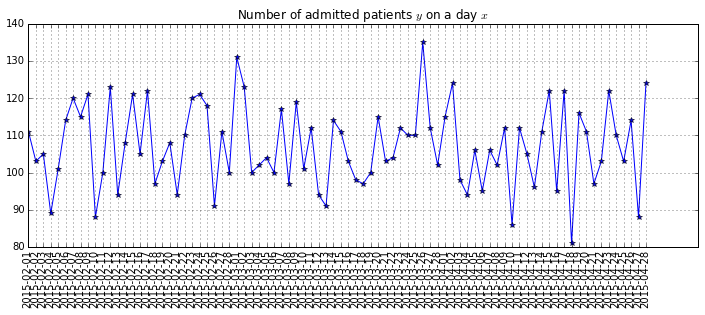

In [5]:
patients.plot_admit_per_day()

**Example** for total number of patients who were admitted for 1 day

In [6]:
l = len(data[data.DaysStay == 1])
print('{} patients stayed for 1 day during the time interval March through April of 2015.'.format(l))

2416 patients stayed for 1 day during the time interval March through April of 2015.


In [5]:
%matplotlib inline
# plot_admit_per_day()
# plot_stay_density()

In [8]:
!python plot_dataset.py

notice the mean of the distribution is approximately = 2, which was originally used in poisson.rvs(mu=2, size=1) to generate the random length of stay in the dataset.


<hr>

# Third
process dataset to aggregate information per daily ticks. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame.from_csv('patients-data.csv', index_col=False)

A look at the dataset

In [11]:
data[:4]

,PatientID,AdmitDay,DaysStay,LeaveDay,ICRoom
0,NYC1000,2015-03-21,0,2015-03-21,no
1,NYC1001,2015-04-10,2,2015-04-12,no
2,NYC1002,2015-04-28,2,2015-04-30,no
3,NYC1003,2015-04-17,0,2015-04-17,no


In [12]:
def daily_ticks():
    
    days = set( data.AdmitDay )
    total = 0
    icroom = 0
    day_total = {}
    
    for d in sorted(days):
        '''
        total patients per a day = admit + still - leave
        '''
        came = len( data[ data.AdmitDay == d ] )
        left = len( data[ data.LeaveDay == d ] )
        
        total += came
        total -= left

        inicu = len( data[ (data.AdmitDay == d) & (data.ICRoom == 'yes') ] )
        outicu = len( data[ (data.LeaveDay == d) & (data.ICRoom == 'yes') ] )
        
        icroom += inicu
        icroom -= outicu
        
        day_total[d] = [came, left, inicu, outicu, icroom, total]
    
    return day_total

## write to daily ticks info to a csv file

In [13]:
import csv
with open('daily_ticks.csv', 'w') as csvfile:
    a = csv.writer(csvfile, delimiter=',')
    a.writerow(['Date', 'InPatients', 'OutPatients', 'InICU', 'OutICU', 'ICUroomTotal', 'OverallTotal'])
    
    entries = daily_ticks()
    
    for k, v in sorted( entries.items() ):
        row = []
        row.append(k)
        
        pin, pout, icuin, icuout, picu, ptotal = v
        row.append(pin)
        row.append(pout)
        row.append(icuin)
        row.append(icuout)
        row.append(picu)
        row.append(ptotal)
        
        a.writerow(row)


**read the written file**

In [14]:
def explore_aggregated_daily_data():
    daily = pd.DataFrame.from_csv('daily_ticks.csv', index_col=False)
    return daily

## plot daily ticks with total patients in the hospital

In [15]:
daily_data = explore_aggregated_daily_data()

def plot_overall_report():
    plt.figure(figsize=(12,4))

    x = daily_data.Date
    y = daily_data.OverallTotal
    y2 = daily_data.ICUroomTotal
    y3 = daily_data.InPatients
    y4 = daily_data.OutPatients

    plt.plot(y3, '-*', label='Admitted into hospital')
    plt.plot(y, '-o', label='Total patients in hosptial')
    plt.plot(y2, '-x', label='Total patients in ICU room')
    plt.plot(y4, '-^', label='Leaving hospital')


    plt.xlabel('Date')
    plt.ylabel('Number of patients')
    plt.xticks(range(len(x)), x, rotation = 90)
    plt.text(60, 10, 'Note: patients in ICU are included in Total patients.')
    plt.legend(bbox_to_anchor = (1.4, 1));plt.grid();plt.show()

<hr>

## Data verification

In [16]:
daily_data[:2]

,Date,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
0,2015-03-01,38,3,5,0,5,35
1,2015-03-02,33,7,3,4,4,61


#### How many patients got into an ICU room at a given day:

In [17]:
print len( data[ (data.AdmitDay == '2015-03-01') & (data.ICRoom == 'yes') ] )
print len( data[ (data.AdmitDay == '2015-03-02') & (data.ICRoom == 'yes') ] )

5
3


#### How many patients left from an ICU room at a given day:

In [18]:
print len( data[ (data.LeaveDay == '2015-03-01') & (data.ICRoom == 'yes') ] )
print len( data[ (data.LeaveDay == '2015-03-02') & (data.ICRoom == 'yes') ] )

0
4


#Forth

In [7]:
import numpy as np

see: http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%206%20-%20String%20Operations-%20Which%20month%20was%20the%20snowiest.ipynb

In [27]:
dailydata = pd.read_csv('daily_ticks.csv', parse_dates=True, index_col='Date')

In [28]:
dailydata = pd.DataFrame.from_csv('daily_ticks.csv', parse_dates=True, index_col='Date')

In [29]:
dailydata[:2]

,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
Date,,,,,,
2015-03-01,38,3,5,0,5,35
2015-03-02,33,7,3,4,4,61


In [37]:
dailydata[dailydata.index == '2015-03-02']

,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
Date,,,,,,
2015-03-02,33,7,3,4,4,61


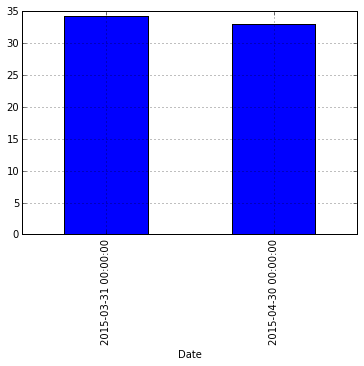

In [31]:
dailydata.OutPatients.resample('M').plot(kind='bar')

<hr>

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%204%20-%20Find%20out%20on%20which%20weekday%20people%20bike%20the%20most%20with%20groupby%20and%20aggregate.ipynb

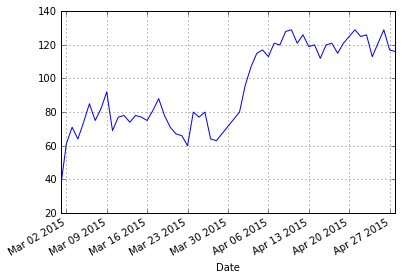

In [54]:
dailies = pd.read_csv('daily_ticks.csv', parse_dates=['Date'], index_col='Date', dayfirst=True)
dailies['OverallTotal'].plot()

In [94]:
dailies[:3]

,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
Date,,,,,,
2015-03-01,38,3,5,0,5,35
2015-03-02,33,7,3,4,4,61
2015-03-03,42,32,5,3,6,71


In [132]:
# box info
c = 'OverallTotal'
print dailies[c].max()
print dailies[c].median()
print dailies[c].min()

129
90.0
35


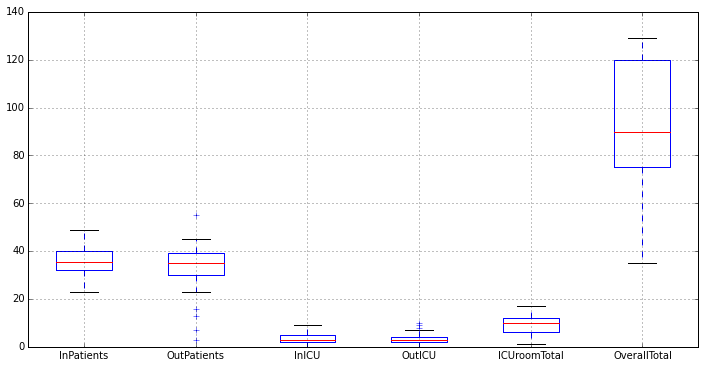

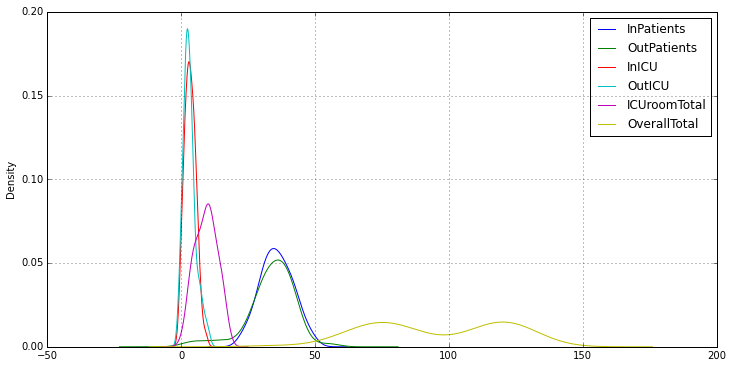

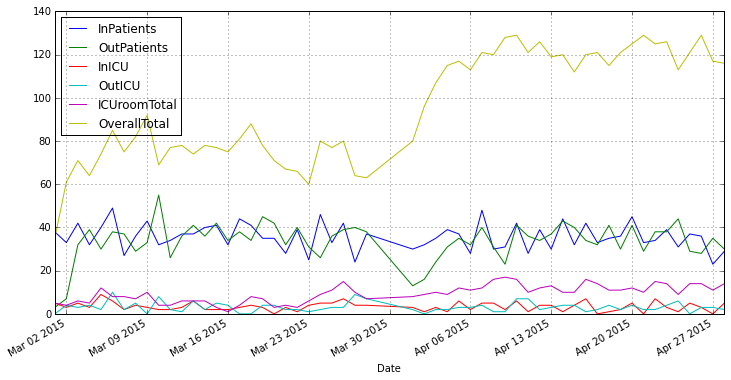

In [113]:
dailies.plot(kind='box', figsize=(12,6))
dailies.plot(kind='kde', figsize=(12,6))
dailies.plot(kind='line', figsize=(12,6), grid=True)

In [133]:
dailies.plot?

# Dataset

health datasets from NYC open data:
https://nycopendata.socrata.com/data?browseSearch=&scope=&agency=&cat=health&type=datasets


large health datasets http://www.ehdp.com/vitalnet/datasets.htm

HealthData.gov http://hub.healthdata.gov/dataset

health http://hcupnet.ahrq.gov

health care databases:
http://www.hcup-us.ahrq.gov

len of stay http://www.hcup-us.ahrq.gov/sidoverview.jsp#data